In [1]:
import random
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv("../data/total-sample-deal_add_similarity.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,acq_FYEAR,target_FYEAR,acq_gvkey,target_gvkey,dealID,acq_STATE,acq_salegr,acq_profit,acq_mleverage,acq_pastret,acq_io_top5,acq_size,acq_PERMNO,target_STATE,target_salegr,target_profit,target_mleverage,target_pastret,target_io_top5,target_size,target_PERMNO,deal,Date_Announced,acquirer_gvkey2,target_gvkey2,search_key1,search_key2,HPs_similarity,RWMD_similarity,LDA_similarity
0,0,0,1994.0,1994.0,23778,10173,023778_010173_1995-06-16,TX,0.939510,0.039785,0.190418,-0.600000,0.247123,4.850944,76632.0,FL,0.794892,0.041354,0.582252,0.448980,0.237958,4.124809,57963.0,1,1995-06-16,23778,10173,1994-023778-010173,1993-023778-010173,NaN,NaN,NaN
1,1,1,1994.0,1994.0,14923,2416,014923_002416_1995-12-22,CO,1.417725,0.055939,0.190765,0.608696,0.064204,3.962925,12199.0,LA,1.175135,0.007795,0.404339,0.250000,0.253290,3.046330,19394.0,1,1995-12-22,14923,2416,1994-014923-002416,1993-014923-002416,NaN,NaN,NaN
2,2,2,1994.0,1993.0,29077,12829,029077_012829_1995-01-04,CA,1.201676,0.095610,0.176620,-0.447059,0.265840,3.924801,79739.0,NY,1.187786,-0.125503,0.419946,-0.483871,0.091378,2.009287,75504.0,1,1995-01-04,29077,12829,1994-029077-012829,1993-029077-012829,NaN,NaN,NaN
3,3,3,1994.0,1994.0,28259,8126,028259_008126_1995-01-12,NY,1.763769,-0.026707,0.208224,0.026667,0.234810,7.062973,79220.0,CT,1.142035,0.016959,0.444123,-0.053067,0.690825,6.144683,44863.0,1,1995-01-12,28259,8126,1994-028259-008126,1993-028259-008126,NaN,NaN,NaN
4,4,4,1994.0,1993.0,1311,14232,001311_014232_1995-01-19,MI,1.301060,0.225934,0.073056,0.073276,0.319689,5.651524,85033.0,CO,1.416327,0.089724,0.002799,0.333333,0.208157,3.264576,10965.0,1,1995-01-19,1311,14232,1994-001311-014232,1993-001311-014232,NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21707 entries, 0 to 21706
Data columns (total 30 columns):
acq_FYEAR           21707 non-null float64
target_FYEAR        21707 non-null float64
acq_gvkey           21707 non-null int64
target_gvkey        21707 non-null int64
dealID              21707 non-null object
acq_STATE           19523 non-null object
acq_salegr          19878 non-null float64
acq_profit          19903 non-null float64
acq_mleverage       19902 non-null float64
acq_pastret         19889 non-null float64
acq_io_top5         19906 non-null float64
acq_size            19906 non-null float64
acq_PERMNO          19906 non-null float64
target_STATE        19148 non-null object
target_salegr       19308 non-null float64
target_profit       19332 non-null float64
target_mleverage    19324 non-null float64
target_pastret      19319 non-null float64
target_io_top5      19341 non-null float64
target_size         19332 non-null float64
target_PERMNO       19341 non-null flo

In [7]:
df['deal'].value_counts()

0    18727
1     2980
Name: deal, dtype: int64

## missing values

In [8]:
df.isnull().sum()

acq_FYEAR               0
target_FYEAR            0
acq_gvkey               0
target_gvkey            0
dealID                  0
acq_STATE            2184
acq_salegr           1829
acq_profit           1804
acq_mleverage        1805
acq_pastret          1818
acq_io_top5          1801
acq_size             1801
acq_PERMNO           1801
target_STATE         2559
target_salegr        2399
target_profit        2375
target_mleverage     2383
target_pastret       2388
target_io_top5       2366
target_size          2375
target_PERMNO        2366
deal                    0
Date_Announced          0
acquirer_gvkey2         0
target_gvkey2           0
search_key1             0
search_key2             0
HPs_similarity      12873
RWMD_similarity      6807
LDA_similarity      12612
dtype: int64

In [51]:
#(df == 0).astype(int).sum(axis=0)

In [9]:
df['Date_Announced']=pd.to_datetime(df['Date_Announced'])

In [10]:
df1=df[df['Date_Announced']>pd.datetime(1996,12,31)]
df1 = df1[df1['Date_Announced']<pd.datetime(2017,1,1)]

In [12]:
df1.isnull().sum()

acq_FYEAR               0
target_FYEAR            0
acq_gvkey               0
target_gvkey            0
dealID                  0
acq_STATE            1899
acq_salegr           1554
acq_profit           1532
acq_mleverage        1534
acq_pastret          1545
acq_io_top5          1530
acq_size             1530
acq_PERMNO           1530
target_STATE         2039
target_salegr        1872
target_profit        1859
target_mleverage     1867
target_pastret       1867
target_io_top5       1850
target_size          1859
target_PERMNO        1850
deal                    0
Date_Announced          0
acquirer_gvkey2         0
target_gvkey2           0
search_key1             0
search_key2             0
HPs_similarity      11054
RWMD_similarity      4860
LDA_similarity      10643
dtype: int64

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19731 entries, 347 to 21609
Data columns (total 30 columns):
acq_FYEAR           19731 non-null float64
target_FYEAR        19731 non-null float64
acq_gvkey           19731 non-null int64
target_gvkey        19731 non-null int64
dealID              19731 non-null object
acq_STATE           17832 non-null object
acq_salegr          18177 non-null float64
acq_profit          18199 non-null float64
acq_mleverage       18197 non-null float64
acq_pastret         18186 non-null float64
acq_io_top5         18201 non-null float64
acq_size            18201 non-null float64
acq_PERMNO          18201 non-null float64
target_STATE        17692 non-null object
target_salegr       17859 non-null float64
target_profit       17872 non-null float64
target_mleverage    17864 non-null float64
target_pastret      17864 non-null float64
target_io_top5      17881 non-null float64
target_size         17872 non-null float64
target_PERMNO       17881 non-null f

In [14]:
df2 = df1.dropna(how='any', subset=['acq_PERMNO','target_PERMNO'])

In [15]:
df2

,acq_FYEAR,target_FYEAR,acq_gvkey,target_gvkey,dealID,acq_STATE,acq_salegr,acq_profit,acq_mleverage,acq_pastret,acq_io_top5,acq_size,acq_PERMNO,target_STATE,target_salegr,target_profit,target_mleverage,target_pastret,target_io_top5,target_size,target_PERMNO,deal,Date_Announced,acquirer_gvkey2,target_gvkey2,search_key1,search_key2,HPs_similarity,RWMD_similarity,LDA_similarity
347,1996.0,1996.0,25495,23743,025495_023743_1997-02-18,TX,1.980444,0.027066,0.221037,1.627930,0.042639,8.339694,81594.0,TX,0.900882,0.037337,0.057868,0.136364,0.100922,7.043287,76593.0,1,1997-02-18,25495,23743,1996-025495-023743,1995-025495-023743,NaN,NaN,NaN
379,1996.0,1996.0,1976,8517,001976_008517_1997-02-26,TX,1.147970,0.053482,0.133323,0.517013,0.253640,8.100887,75034.0,MO,0.988561,0.063068,0.106269,0.423754,0.215980,5.709721,62384.0,1,1997-02-26,1976,8517,1996-001976-008517,1995-001976-008517,NaN,0.487075,NaN
383,1996.0,1996.0,16766,17018,016766_017018_1997-02-13,NH,1.692686,0.008171,0.545954,0.082930,0.049167,7.344132,11120.0,NH,1.021503,0.021935,0.000000,-0.014896,0.177036,5.604216,11921.0,1,1997-02-13,16766,17018,1996-016766-017018,1995-016766-017018,0.2267,0.542035,1.000000
388,1996.0,1996.0,28994,14126,028994_014126_1997-04-03,SC,1.848127,0.018818,0.247289,0.168831,0.333854,6.199295,79701.0,CA,1.953173,0.209476,0.000000,0.913067,0.040700,3.769883,75251.0,1,1997-04-03,28994,14126,1996-028994-014126,1995-028994-014126,NaN,NaN,NaN
412,1996.0,1996.0,61058,2304,061058_002304_1997-01-07,OK,1.168392,0.037616,0.206753,0.142857,0.063638,4.863225,81859.0,OK,1.208697,-0.013772,0.126423,0.478571,0.000000,2.333211,18738.0,1,1997-01-07,61058,2304,1996-061058-002304,1995-061058-002304,NaN,0.638155,0.647508
413,1996.0,1996.0,25138,3289,025138_003289_1997-01-07,TX,NaN,NaN,0.000000,-0.608392,0.194350,4.717632,77505.0,CA,0.777861,-0.225408,0.151568,-0.390000,0.201034,4.105120,25604.0,1,1997-01-07,25138,3289,1996-025138-003289,1995-025138-003289,0.1144,NaN,NaN
414,1996.0,1996.0,29356,62834,029356_062834_1997-01-13,CA,1.498319,0.204390,0.000000,0.963816,0.279692,3.866837,80055.0,CA,1.613852,-0.011605,0.002685,-0.309859,0.092065,3.783007,83542.0,1,1997-01-13,29356,62834,1996-029356-062834,1995-029356-062834,0.1137,0.813304,0.204321
415,1996.0,1996.0,27747,12232,027747_012232_1997-01-13,CA,1.907900,-0.092917,0.056090,-0.087500,0.310244,4.603258,78815.0,CA,0.000000,-1.068043,0.011826,0.676471,0.270589,2.963725,10328.0,1,1997-01-13,27747,12232,1996-027747-012232,1995-027747-012232,0.0954,NaN,NaN
416,1996.0,1996.0,2051,29373,002051_029373_1997-01-14,FL,1.037031,0.013691,0.280167,0.437741,0.115589,10.626955,61284.0,NY,1.239438,0.012452,0.800840,0.309859,0.185577,7.326902,80009.0,1,1997-01-14,2051,29373,1996-002051-029373,1995-002051-029373,NaN,NaN,NaN
417,1996.0,1996.0,6304,27919,006304_027919_1997-01-14,CA,1.570619,0.169597,0.002621,-0.398058,0.346431,6.569162,46886.0,CA,1.220998,0.126519,0.034763,0.082051,0.264825,6.182950,79015.0,1,1997-01-14,6304,27919,1996-006304-027919,1995-006304-027919,0.1206,0.764627,NaN


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16351 entries, 347 to 21609
Data columns (total 30 columns):
acq_FYEAR           16351 non-null float64
target_FYEAR        16351 non-null float64
acq_gvkey           16351 non-null int64
target_gvkey        16351 non-null int64
dealID              16351 non-null object
acq_STATE           16029 non-null object
acq_salegr          16327 non-null float64
acq_profit          16349 non-null float64
acq_mleverage       16347 non-null float64
acq_pastret         16336 non-null float64
acq_io_top5         16351 non-null float64
acq_size            16351 non-null float64
acq_PERMNO          16351 non-null float64
target_STATE        16199 non-null object
target_salegr       16329 non-null float64
target_profit       16342 non-null float64
target_mleverage    16334 non-null float64
target_pastret      16334 non-null float64
target_io_top5      16351 non-null float64
target_size         16342 non-null float64
target_PERMNO       16351 non-null f

In [17]:
df2.isnull().sum()

acq_FYEAR              0
target_FYEAR           0
acq_gvkey              0
target_gvkey           0
dealID                 0
acq_STATE            322
acq_salegr            24
acq_profit             2
acq_mleverage          4
acq_pastret           15
acq_io_top5            0
acq_size               0
acq_PERMNO             0
target_STATE         152
target_salegr         22
target_profit          9
target_mleverage      17
target_pastret        17
target_io_top5         0
target_size            9
target_PERMNO          0
deal                   0
Date_Announced         0
acquirer_gvkey2        0
target_gvkey2          0
search_key1            0
search_key2            0
HPs_similarity      8915
RWMD_similarity     3660
LDA_similarity      8499
dtype: int64

In [18]:
#df2[df2['acq_STATE'].isnull()]

In [19]:
df2['acq_salegr'].fillna(df2['acq_salegr'].median(),inplace = True)
df2['acq_profit'].fillna(df2['acq_profit'].median(),inplace = True)
df2['acq_mleverage'].fillna(df2['acq_mleverage'].median(),inplace = True)
df2['acq_pastret'].fillna(df2['acq_pastret'].median(),inplace = True)
df2['target_salegr'].fillna(df2['target_salegr'].median(),inplace = True)
df2['target_profit'].fillna(df2['target_profit'].median(),inplace = True)
df2['target_mleverage'].fillna(df2['target_mleverage'].median(),inplace = True)
df2['target_pastret'].fillna(df2['target_pastret'].median(),inplace = True)
df2['target_size'].fillna(df2['target_size'].median(),inplace = True)

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [20]:
df2.isnull().sum()

acq_FYEAR              0
target_FYEAR           0
acq_gvkey              0
target_gvkey           0
dealID                 0
acq_STATE            322
acq_salegr             0
acq_profit             0
acq_mleverage          0
acq_pastret            0
acq_io_top5            0
acq_size               0
acq_PERMNO             0
target_STATE         152
target_salegr          0
target_profit          0
target_mleverage       0
target_pastret         0
target_io_top5         0
target_size            0
target_PERMNO          0
deal                   0
Date_Announced         0
acquirer_gvkey2        0
target_gvkey2          0
search_key1            0
search_key2            0
HPs_similarity      8915
RWMD_similarity     3660
LDA_similarity      8499
dtype: int64

In [21]:
def state_match(x,y):
    if (pd.isna(x)) or (pd.isna(y)):
        return np.random.choice([True, False])
    elif(pd.notna(x) and pd.notna(y) and (x!=y)): 
        return False
    elif(pd.notna(x) and pd.notna(y) and (x==y)):
         return True                    

df2['state_match'] = df2.apply(lambda row: state_match(row['acq_STATE'], row['target_STATE']),axis=1)
df2

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,acq_FYEAR,target_FYEAR,acq_gvkey,target_gvkey,dealID,acq_STATE,acq_salegr,acq_profit,acq_mleverage,acq_pastret,acq_io_top5,acq_size,acq_PERMNO,target_STATE,target_salegr,target_profit,target_mleverage,target_pastret,target_io_top5,target_size,target_PERMNO,deal,Date_Announced,acquirer_gvkey2,target_gvkey2,search_key1,search_key2,HPs_similarity,RWMD_similarity,LDA_similarity,state_match
347,1996.0,1996.0,25495,23743,025495_023743_1997-02-18,TX,1.980444,0.027066,0.221037,1.627930,0.042639,8.339694,81594.0,TX,0.900882,0.037337,0.057868,0.136364,0.100922,7.043287,76593.0,1,1997-02-18,25495,23743,1996-025495-023743,1995-025495-023743,NaN,NaN,NaN,True
379,1996.0,1996.0,1976,8517,001976_008517_1997-02-26,TX,1.147970,0.053482,0.133323,0.517013,0.253640,8.100887,75034.0,MO,0.988561,0.063068,0.106269,0.423754,0.215980,5.709721,62384.0,1,1997-02-26,1976,8517,1996-001976-008517,1995-001976-008517,NaN,0.487075,NaN,False
383,1996.0,1996.0,16766,17018,016766_017018_1997-02-13,NH,1.692686,0.008171,0.545954,0.082930,0.049167,7.344132,11120.0,NH,1.021503,0.021935,0.000000,-0.014896,0.177036,5.604216,11921.0,1,1997-02-13,16766,17018,1996-016766-017018,1995-016766-017018,0.2267,0.542035,1.000000,True
388,1996.0,1996.0,28994,14126,028994_014126_1997-04-03,SC,1.848127,0.018818,0.247289,0.168831,0.333854,6.199295,79701.0,CA,1.953173,0.209476,0.000000,0.913067,0.040700,3.769883,75251.0,1,1997-04-03,28994,14126,1996-028994-014126,1995-028994-014126,NaN,NaN,NaN,False
412,1996.0,1996.0,61058,2304,061058_002304_1997-01-07,OK,1.168392,0.037616,0.206753,0.142857,0.063638,4.863225,81859.0,OK,1.208697,-0.013772,0.126423,0.478571,0.000000,2.333211,18738.0,1,1997-01-07,61058,2304,1996-061058-002304,1995-061058-002304,NaN,0.638155,0.647508,True
413,1996.0,1996.0,25138,3289,025138_003289_1997-01-07,TX,1.100956,0.026581,0.000000,-0.608392,0.194350,4.717632,77505.0,CA,0.777861,-0.225408,0.151568,-0.390000,0.201034,4.105120,25604.0,1,1997-01-07,25138,3289,1996-025138-003289,1995-025138-003289,0.1144,NaN,NaN,False
414,1996.0,1996.0,29356,62834,029356_062834_1997-01-13,CA,1.498319,0.204390,0.000000,0.963816,0.279692,3.866837,80055.0,CA,1.613852,-0.011605,0.002685,-0.309859,0.092065,3.783007,83542.0,1,1997-01-13,29356,62834,1996-029356-062834,1995-029356-062834,0.1137,0.813304,0.204321,True
415,1996.0,1996.0,27747,12232,027747_012232_1997-01-13,CA,1.907900,-0.092917,0.056090,-0.087500,0.310244,4.603258,78815.0,CA,0.000000,-1.068043,0.011826,0.676471,0.270589,2.963725,10328.0,1,1997-01-13,27747,12232,1996-027747-012232,1995-027747-012232,0.0954,NaN,NaN,True
416,1996.0,1996.0,2051,29373,002051_029373_1997-01-14,FL,1.037031,0.013691,0.280167,0.437741,0.115589,10.626955,61284.0,NY,1.239438,0.012452,0.800840,0.309859,0.185577,7.326902,80009.0,1,1997-01-14,2051,29373,1996-002051-029373,1995-002051-029373,NaN,NaN,NaN,False
417,1996.0,1996.0,6304,27919,006304_027919_1997-01-14,CA,1.570619,0.169597,0.002621,-0.398058,0.346431,6.569162,46886.0,CA,1.220998,0.126519,0.034763,0.082051,0.264825,6.182950,79015.0,1,1997-01-14,6304,27919,1996-006304-027919,1995-006304-027919,0.1206,0.764627,NaN,True


In [22]:
df2['state_match'].value_counts()

False    13916
True      2435
Name: state_match, dtype: int64

In [23]:
#df1['state_match'].fillna(pd.Series(np.random.choice([True, False], p=[0.15,0.85], size=len(df1))), inplace =True)

In [24]:
df2.isnull().sum()

acq_FYEAR              0
target_FYEAR           0
acq_gvkey              0
target_gvkey           0
dealID                 0
acq_STATE            322
acq_salegr             0
acq_profit             0
acq_mleverage          0
acq_pastret            0
acq_io_top5            0
acq_size               0
acq_PERMNO             0
target_STATE         152
target_salegr          0
target_profit          0
target_mleverage       0
target_pastret         0
target_io_top5         0
target_size            0
target_PERMNO          0
deal                   0
Date_Announced         0
acquirer_gvkey2        0
target_gvkey2          0
search_key1            0
search_key2            0
HPs_similarity      8915
RWMD_similarity     3660
LDA_similarity      8499
state_match            0
dtype: int64

In [25]:
df2['state_match']=df2['state_match'].astype(int)

/Users/jiahuibi/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


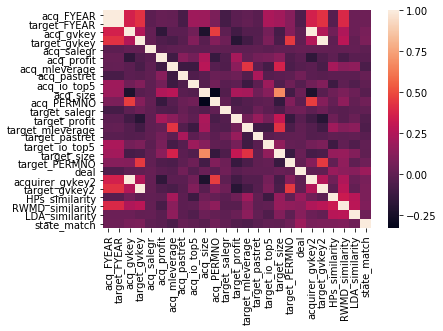

In [26]:
corr = df2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

<Figure size 1440x648 with 0 Axes>

Text(0.5,1,'HPs_similarity')

Text(0.5,1,'RWMD_similarity')

Text(0.5,1,'LDA_similarity')

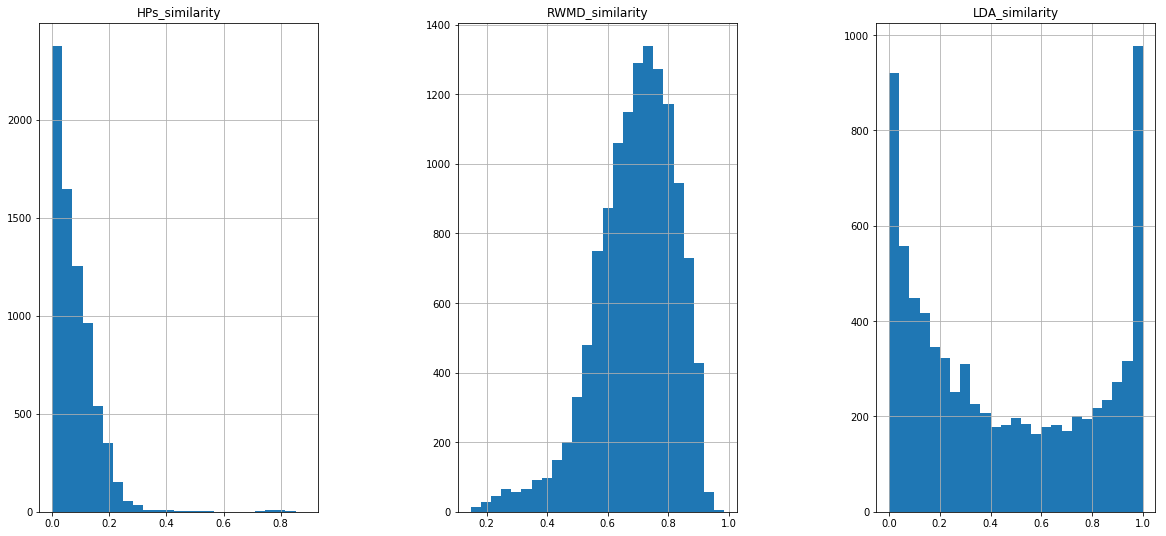

In [27]:
%matplotlib inline
plt.figure(figsize=(20,9))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.subplot(1,3,1)
plt.title("HPs_similarity")
df2['HPs_similarity'].hist(bins=25)
plt.subplot(1,3,2)
plt.title("RWMD_similarity")
df2['RWMD_similarity'].hist(bins=25)
plt.subplot(1,3,3)
plt.title("LDA_similarity")
df2['LDA_similarity'].hist(bins=25)


In [28]:
df2[df2['LDA_similarity'].isnull()]

,acq_FYEAR,target_FYEAR,acq_gvkey,target_gvkey,dealID,acq_STATE,acq_salegr,acq_profit,acq_mleverage,acq_pastret,acq_io_top5,acq_size,acq_PERMNO,target_STATE,target_salegr,target_profit,target_mleverage,target_pastret,target_io_top5,target_size,target_PERMNO,deal,Date_Announced,acquirer_gvkey2,target_gvkey2,search_key1,search_key2,HPs_similarity,RWMD_similarity,LDA_similarity,state_match
347,1996.0,1996.0,25495,23743,025495_023743_1997-02-18,TX,1.980444,0.027066,0.221037,1.627930,0.042639,8.339694,81594.0,TX,0.900882,0.037337,0.057868,0.136364,0.100922,7.043287,76593.0,1,1997-02-18,25495,23743,1996-025495-023743,1995-025495-023743,NaN,NaN,NaN,1
379,1996.0,1996.0,1976,8517,001976_008517_1997-02-26,TX,1.147970,0.053482,0.133323,0.517013,0.253640,8.100887,75034.0,MO,0.988561,0.063068,0.106269,0.423754,0.215980,5.709721,62384.0,1,1997-02-26,1976,8517,1996-001976-008517,1995-001976-008517,NaN,0.487075,NaN,0
388,1996.0,1996.0,28994,14126,028994_014126_1997-04-03,SC,1.848127,0.018818,0.247289,0.168831,0.333854,6.199295,79701.0,CA,1.953173,0.209476,0.000000,0.913067,0.040700,3.769883,75251.0,1,1997-04-03,28994,14126,1996-028994-014126,1995-028994-014126,NaN,NaN,NaN,0
413,1996.0,1996.0,25138,3289,025138_003289_1997-01-07,TX,1.100956,0.026581,0.000000,-0.608392,0.194350,4.717632,77505.0,CA,0.777861,-0.225408,0.151568,-0.390000,0.201034,4.105120,25604.0,1,1997-01-07,25138,3289,1996-025138-003289,1995-025138-003289,0.1144,NaN,NaN,0
415,1996.0,1996.0,27747,12232,027747_012232_1997-01-13,CA,1.907900,-0.092917,0.056090,-0.087500,0.310244,4.603258,78815.0,CA,0.000000,-1.068043,0.011826,0.676471,0.270589,2.963725,10328.0,1,1997-01-13,27747,12232,1996-027747-012232,1995-027747-012232,0.0954,NaN,NaN,1
416,1996.0,1996.0,2051,29373,002051_029373_1997-01-14,FL,1.037031,0.013691,0.280167,0.437741,0.115589,10.626955,61284.0,NY,1.239438,0.012452,0.800840,0.309859,0.185577,7.326902,80009.0,1,1997-01-14,2051,29373,1996-002051-029373,1995-002051-029373,NaN,NaN,NaN,0
417,1996.0,1996.0,6304,27919,006304_027919_1997-01-14,CA,1.570619,0.169597,0.002621,-0.398058,0.346431,6.569162,46886.0,CA,1.220998,0.126519,0.034763,0.082051,0.264825,6.182950,79015.0,1,1997-01-14,6304,27919,1996-006304-027919,1995-006304-027919,0.1206,0.764627,NaN,1
419,1996.0,1996.0,22260,23826,022260_023826_1997-01-15,TN,1.125120,0.070750,0.203287,0.207147,0.187840,9.965147,76171.0,CT,1.050968,0.058416,0.076951,-0.290909,0.274117,7.004178,76615.0,1,1997-01-15,22260,23826,1996-022260-023826,1995-022260-023826,0.0112,NaN,NaN,0
421,1996.0,1996.0,28733,25994,028733_025994_1997-01-16,IL,1.230060,0.035208,0.372806,0.441652,0.373198,8.001733,79547.0,NY,1.006193,0.029965,0.457186,0.147731,0.139830,6.628424,78090.0,1,1997-01-16,28733,25994,1996-028733-025994,1995-028733-025994,0.1610,0.751907,NaN,0
424,1996.0,1995.0,25279,24867,025279_024867_1997-01-20,MA,1.321106,0.110510,0.021973,0.218274,0.126912,7.321273,77605.0,CA,1.469121,0.102402,0.000000,2.321918,0.320667,4.738608,77283.0,1,1997-01-20,25279,24867,1996-025279-024867,1995-025279-024867,0.0900,NaN,NaN,0


In [29]:
df3 = df2.dropna(how='any', subset=['HPs_similarity','RWMD_similarity','LDA_similarity'])
df3.info()
df3.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4726 entries, 383 to 21452
Data columns (total 31 columns):
acq_FYEAR           4726 non-null float64
target_FYEAR        4726 non-null float64
acq_gvkey           4726 non-null int64
target_gvkey        4726 non-null int64
dealID              4726 non-null object
acq_STATE           4681 non-null object
acq_salegr          4726 non-null float64
acq_profit          4726 non-null float64
acq_mleverage       4726 non-null float64
acq_pastret         4726 non-null float64
acq_io_top5         4726 non-null float64
acq_size            4726 non-null float64
acq_PERMNO          4726 non-null float64
target_STATE        4704 non-null object
target_salegr       4726 non-null float64
target_profit       4726 non-null float64
target_mleverage    4726 non-null float64
target_pastret      4726 non-null float64
target_io_top5      4726 non-null float64
target_size         4726 non-null float64
target_PERMNO       4726 non-null float64
deal           

Index(['acq_FYEAR', 'target_FYEAR', 'acq_gvkey', 'target_gvkey', 'dealID',
       'acq_STATE', 'acq_salegr', 'acq_profit', 'acq_mleverage', 'acq_pastret',
       'acq_io_top5', 'acq_size', 'acq_PERMNO', 'target_STATE',
       'target_salegr', 'target_profit', 'target_mleverage', 'target_pastret',
       'target_io_top5', 'target_size', 'target_PERMNO', 'deal',
       'Date_Announced', 'acquirer_gvkey2', 'target_gvkey2', 'search_key1',
       'search_key2', 'HPs_similarity', 'RWMD_similarity', 'LDA_similarity',
       'state_match'],
      dtype='object')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

GaussianNB(priors=None)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

<Figure size 504x360 with 0 Axes>

<BarContainer object of 6 artists>

(0, 1)

Text(0,0.630946,'0.61')

Text(1,0.631932,'0.61')

Text(2,0.684217,'0.66')

Text(3,0.687166,'0.67')

Text(4,0.70379,'0.68')

Text(5,0.723184,'0.70')

([<matplotlib.axis.XTick at 0x10f737b70>,
 <a list of 6 Text xticklabel objects>)

Text(0.5,0,'Estimator')

Text(0,0.5,'AUC')

Text(0.5,1,'AUC')

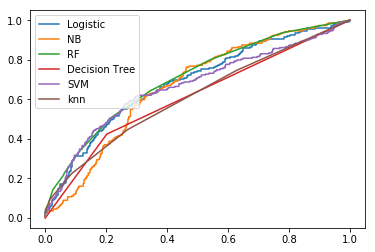

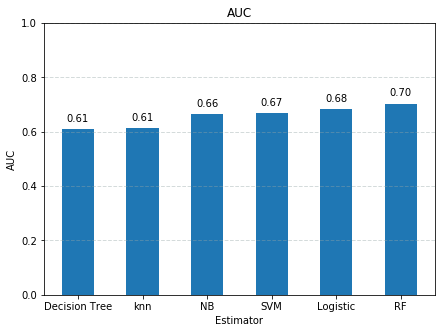

In [30]:
ests = [LogisticRegression(), GaussianNB(), RandomForestClassifier(),
        tree.DecisionTreeClassifier(), SVC(probability=True) ,KNeighborsClassifier()]
ests_labels = np.array(['Logistic', 'NB', 'RF',  'Decision Tree','SVM','knn'])
errvals = np.array([])
dropcolum=['acq_FYEAR', 'target_FYEAR', 'acq_gvkey', 'target_gvkey', 'dealID',
       'acq_STATE',  'acq_PERMNO', 'target_STATE', 'target_PERMNO', 'deal','Date_Announced', 
           'acquirer_gvkey2', 'target_gvkey2', 'search_key1','search_key2']
X_train, X_test, y_train, y_test = train_test_split(df3.drop(dropcolum, axis=1),
                                                    df3.deal, test_size=0.2,stratify = df3.deal, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    fpr, tpr, thresholds = metrics.roc_curve(y_test,  e.predict_proba(X_test)[:,1], pos_label=1)
    #this_err = metrics.accuracy_score(y_test, e.predict(X_test))
    plt.plot(fpr, tpr,label=ests_labels[ests.index(e)])
    plt.legend(loc='upper left')
    this_err = metrics.auc(fpr,tpr)
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt],width=0.5, align='center')
plt.ylim(0,1)
for x,y in zip(pos, errvals[srt]):
    plt.text(x, y+0.02, '%.2f' % y, ha='center', va= 'bottom')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('AUC')
plt.title('AUC')
plt.grid(color='#95a5a6',linestyle='--', linewidth=1,axis='y',alpha=0.4)
plt.show()

In [31]:
from sklearn.grid_search import GridSearchCV
from pprint import pprint
clf=RandomForestClassifier(random_state=123)
parameters = {'n_estimators': [250,350], 
              'max_features':[4,7,'auto'], 
              'min_samples_split':[30,60],
              'min_samples_leaf':[50,70]
             }
grid_search = GridSearchCV(estimator=clf,param_grid=parameters, cv=10, scoring='roc_auc')
print("parameters:")
pprint(parameters)
grid_search.fit(X_train,y_train)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters=grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jiahuibi/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


parameters:
{'max_features': [4, 7, 'auto'],
 'min_samples_leaf': [50, 70],
 'min_samples_split': [30, 60],
 'n_estimators': [250, 350]}


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [250, 350], 'max_features': [4, 7, 'auto'], 'min_samples_split': [30, 60], 'min_samples_leaf': [50, 70]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

Best score: 0.769
Best parameters set:
	max_features: 7
	min_samples_leaf: 50
	min_samples_split: 30
	n_estimators: 350


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

0.7751842599920854

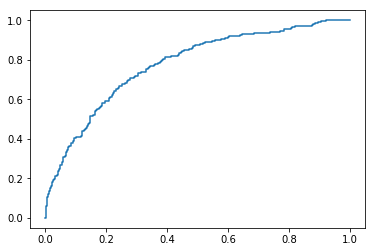

In [32]:
best_model=grid_search.best_estimator_

best_model.fit(X_train, y_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test,  best_model.predict_proba(X_test)[:,1], pos_label=1)
    #this_err = metrics.accuracy_score(y_test, e.predict(X_test))
plt.plot(fpr, tpr,label=ests_labels[ests.index(e)])
this_err = metrics.auc(fpr,tpr)
this_err